In [1]:
# Cell 1: Import Libraries and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the cleaned data
df = pd.read_csv('../data/cleaned_heart_disease.csv')

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

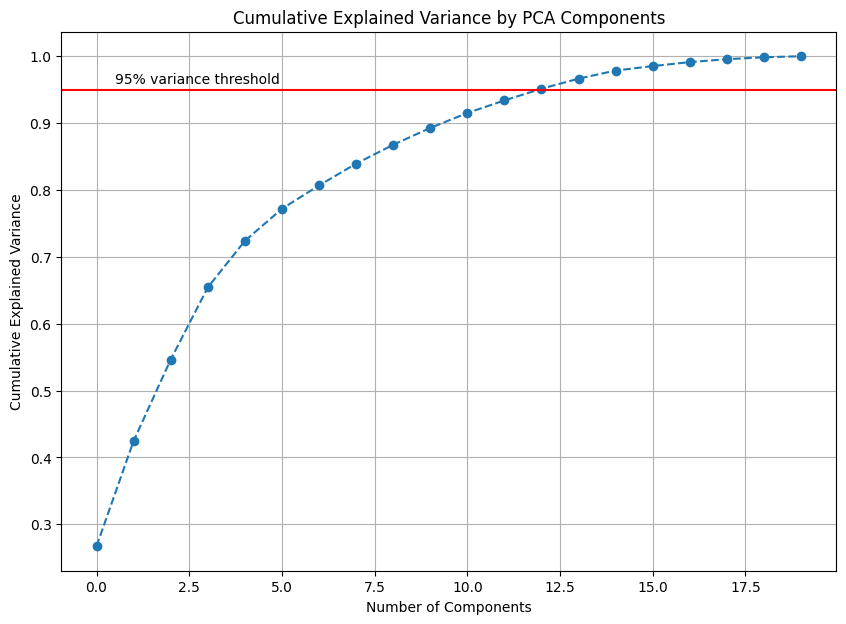

In [2]:
# Cell 2: Apply PCA
# We apply PCA to see how many components are needed to explain the variance.
pca = PCA().fit(X)

# Plot the cumulative variance explained
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.96, '95% variance threshold')
plt.show()

In [3]:
# Cell 3: Apply PCA with the optimal number of components
# Let's choose a number that explains ~95% of the variance (e.g., 10 components)
n_components = 10
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Create a new DataFrame with PCA components
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC_{i+1}' for i in range(n_components)])
pca_df['target'] = y.values

# Save the PCA-transformed data
pca_df.to_csv('../data/pca_heart_disease.csv', index=False)

print(f"PCA applied. Transformed data with {n_components} components saved.")

PCA applied. Transformed data with 10 components saved.
